In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
n_train, n_test, num_inputs, batch_size = 100, 20, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
train_iter = d2l.load_array(train_data, batch_size)
test_iter = d2l.load_array(test_data, batch_size)

In [20]:
def train(train_iter, test_iter, wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{'params': net[0].weight, 'weight_decay': wd},
                              {'params': net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                           xlim=[5, num_epochs], legend=['train', 'test'])  # 评估动画
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                        d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 10.596870422363281


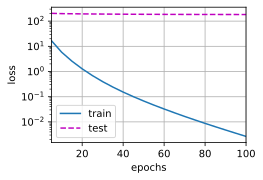

In [21]:
train(train_iter, test_iter, 0)

w的L2范数： 0.05219947546720505


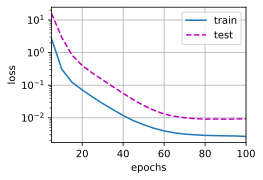

In [22]:
train(train_iter, test_iter, 3)